In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [97]:
'''
age: Age of the client (numeric)
job: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.)
marital: Marital status (categorical: "married", "single", "divorced")
education: Level of education (categorical: "primary", "secondary", "tertiary", "unknown")
default: Has credit in default? (categorical: "yes", "no")
balance: Average yearly balance in euros (numeric)
housing: Has a housing loan? (categorical: "yes", "no")
loan: Has a personal loan? (categorical: "yes", "no")
contact: Type of communication contact (categorical: "unknown", "telephone", "cellular")
day: Last contact day of the month (numeric, 1-31)
month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "dec")
duration: Last contact duration in seconds (numeric)
campaign: Number of contacts performed during this campaign (numeric)
pdays: Number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted)
previous: Number of contacts performed before this campaign (numeric)
poutcome: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
y: The target variable, whether the client subscribed to a term deposit (binary: "yes", "no")

'''

'\nage: Age of the client (numeric)\njob: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.)\nmarital: Marital status (categorical: "married", "single", "divorced")\neducation: Level of education (categorical: "primary", "secondary", "tertiary", "unknown")\ndefault: Has credit in default? (categorical: "yes", "no")\nbalance: Average yearly balance in euros (numeric)\nhousing: Has a housing loan? (categorical: "yes", "no")\nloan: Has a personal loan? (categorical: "yes", "no")\ncontact: Type of communication contact (categorical: "unknown", "telephone", "cellular")\nday: Last contact day of the month (numeric, 1-31)\nmonth: Last contact month of the year (categorical: "jan", "feb", "mar", …, "dec")\nduration: Last contact duration in seconds (numeric)\ncampaign: Number of contacts performed during this campaign (numeric)\npdays: Number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted)\np

Try : HistGBM , Bagging, Neural Network BC 

In [2]:
train = pd.read_csv('train.csv', index_col='id')

In [3]:
train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0


In [4]:
train.shape

(750000, 17)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [42]:
numerical_cols = train.select_dtypes(include=np.number).columns
categorical_cols = train.select_dtypes(include=object).columns

print(f'Numerical Cols : {numerical_cols.values} \n Categorical Cols: {categorical_cols.values}')

Numerical Cols : ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous' 'y'] 
 Categorical Cols: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome']


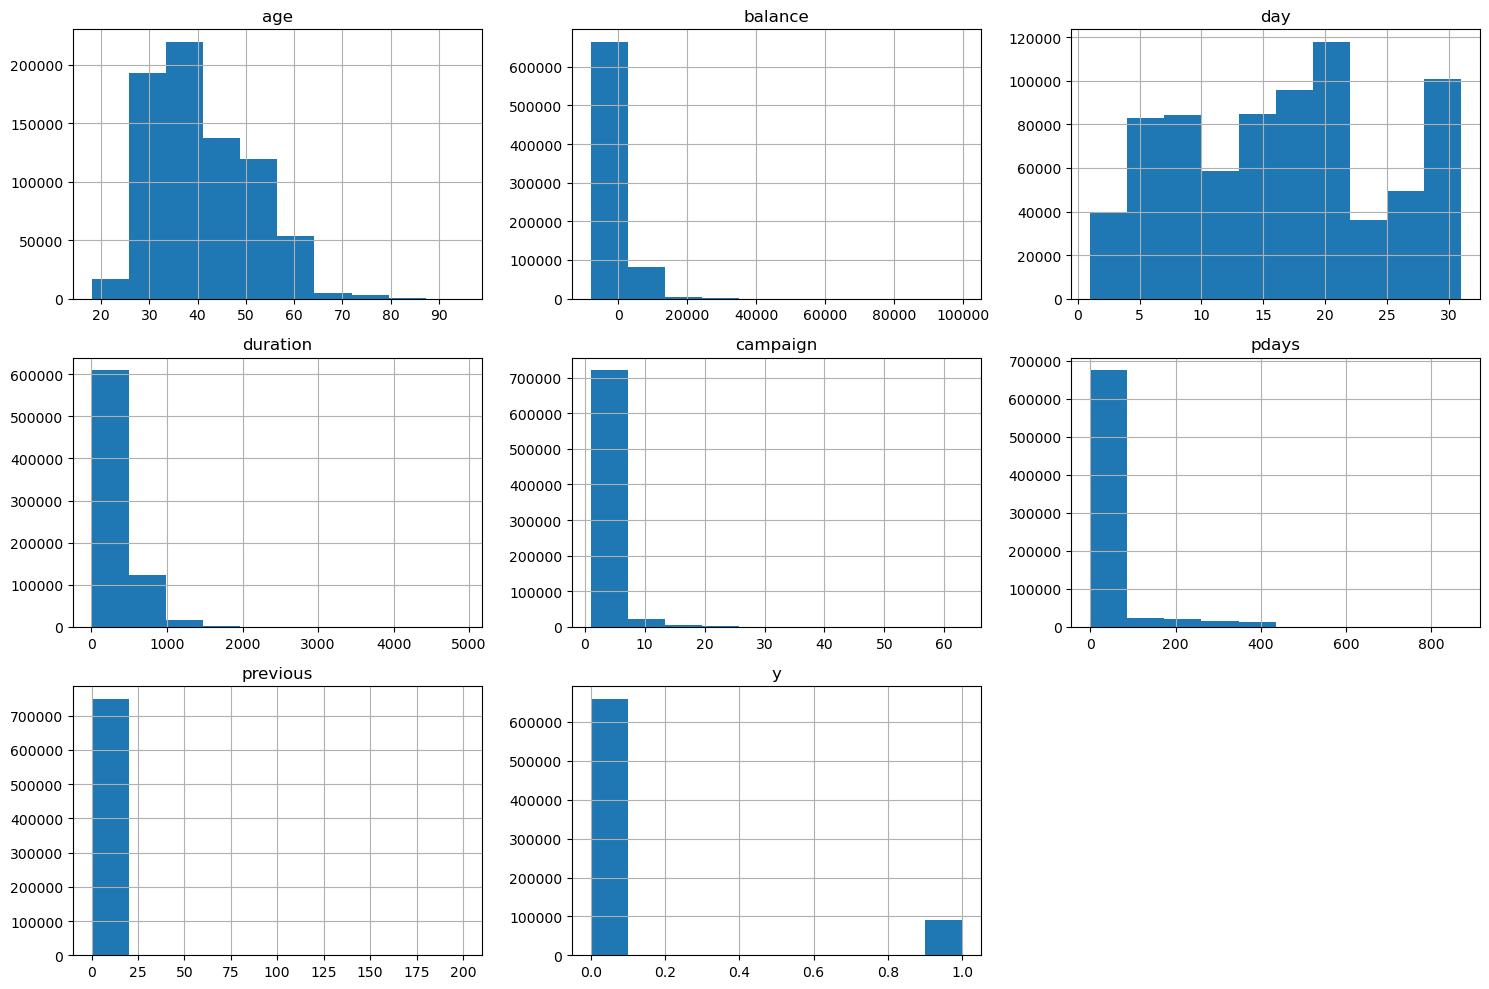

In [96]:
train[numerical_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.title('Numerical Histograms')
plt.show()

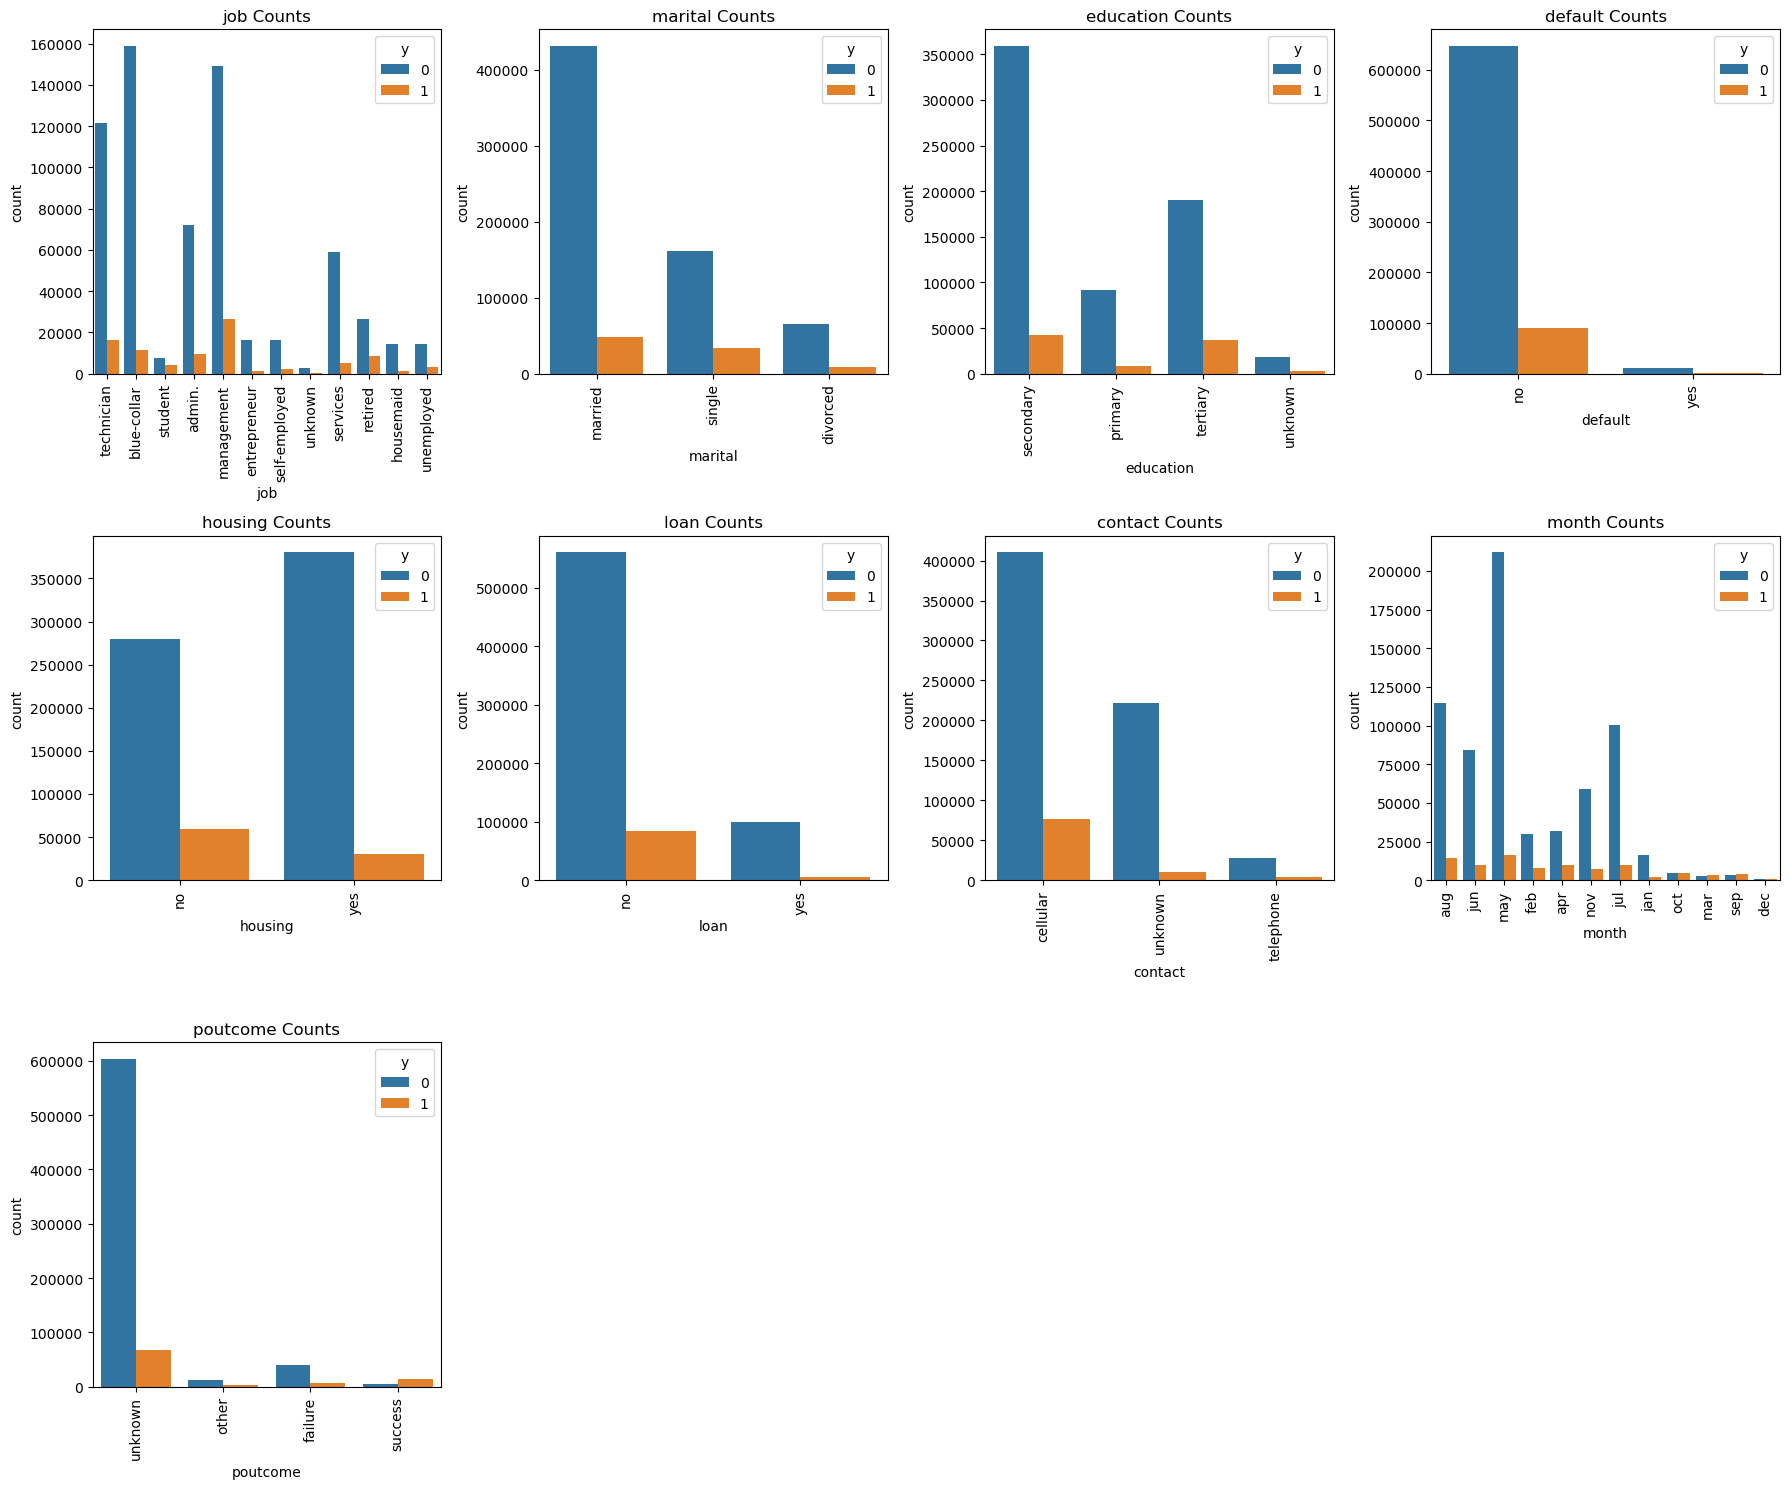

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=(3), figsize = (18,15))
axes = axes.flatten()

for ax,col in zip(axes , categorical_cols):    
        ax.set_title(f'{col} counts')
        sns.countplot(data=train, x=col, hue='y', ax=ax)
        ax.tick_params(axis='x', labelrotation = 90)
        
for ax in axes[len(categorical_cols):]:
        ax.set_visible(False)
        
plt.tight_layout()
plt.show()

In [101]:
for col in train.columns:
    print(train[col].value_counts())

age
32    37235
33    34511
31    34301
34    34131
35    33057
      ...  
90        6
92        5
94        4
95        3
91        1
Name: count, Length: 78, dtype: int64
job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64
default
no     737151
yes     12849
Name: count, dtype: int64
balance
 0        93159
 5         4174
 4         3741
-1         3573
 3         3429
          ...  
 8943         1
 52496        1
 10821        1
 52357        1
 8218         1
Name: count, Length: 8217, dtype: int64
housing
yes    

In [ ]:
from sklearn.model_selection import cr

In [124]:
from sklearn.ensemble import HistGradientBoostingClassifier

X = train.drop(columns=['y'])
y = train['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

HGB = HistGradientBoostingClassifier(categorical_features=categorical_cols).fit(X_train,y_train)


In [125]:
pred_HGB = classifier.predict(X_test)
pred_prob_HGB = classifier.predict_proba(X_test)

In [131]:
print(classification_report(y_test, pred_HGB))
print(f'Accuracy: {accuracy_score(y_test, pred_HGB)}')
print(f'F1 Score: {f1_score(y_test, pred_HGB)}')

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    132119
           1       0.76      0.68      0.72     17881

    accuracy                           0.94    150000
   macro avg       0.86      0.83      0.84    150000
weighted avg       0.93      0.94      0.93    150000

Accuracy: 0.9360266666666667
F1 Score: 0.7173823408140425
